# Calcolo media, varianza campionaria, deviazione standard

In [6]:
import numpy as np

# Dati
resistenze = np.array([3960, 4090, 3200, 3100, 2940, 3830, 4090, 4040, 3780])

# Intervallo di variazione
range_variation = np.max(resistenze) - np.min(resistenze)
print(f"Intervallo di variazione: {range_variation} psi")

# Media
mean_resistance = np.mean(resistenze)
print(f"Media: {mean_resistance:.2f} psi")

n = len(resistenze)  # Numero di elementi nel campione
mean_resistance = np.mean(resistenze)  # Media campionaria

# Calcolo della somma dei quadrati delle differenze dalla media
sum_squared_diff = sum((x - mean_resistance) ** 2 for x in resistenze)

# Varianza campionaria (formula con n-1 nel denominatore)
variance = sum_squared_diff / (n - 1)
print(f"Varianza campionaria: {variance:.2f} psi²")

# Deviazione standard campionaria (radice quadrata della varianza)
std_dev = variance ** 0.5
print(f"Deviazione standard campionaria: {std_dev:.2f} psi")

Intervallo di variazione: 1150 psi
Media: 3670.00 psi
Varianza campionaria: 211275.00 psi²
Deviazione standard campionaria: 459.65 psi


In [8]:
sum([1,2])

3

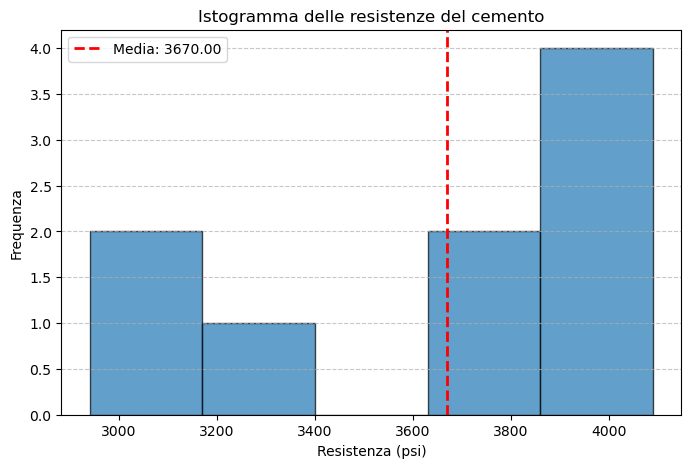

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Creazione dell'istogramma
plt.figure(figsize=(8, 5))
plt.hist(resistenze, bins=5, edgecolor='black', alpha=0.7)
plt.axvline(mean_resistance, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_resistance:.2f}')
plt.xlabel("Resistenza (psi)")
plt.ylabel("Frequenza")
plt.title("Istogramma delle resistenze del cemento")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Regressione Lineare

Media metratura: 122.25
Media prezzo: 173.51
Deviazione standard metratura: 15.22
Deviazione standard prezzo: 12.26
Somma dei prodotti degli z-score: 7.33
Coefficiente di correlazione: 0.92
Retta di regressione (calcolo esplicito): y = 0.74x + 83.24
Retta di regressione (Scipy): y = 0.74x + 83.24
Un aumento di 1 m² è associato a un aumento medio di 0.74 mila dollari.
L'intercetta indica il prezzo previsto per una casa con 0 m², ma non ha un significato realistico.
Prezzo stimato per una casa di 101.44 m²: 158.14 mila dollari


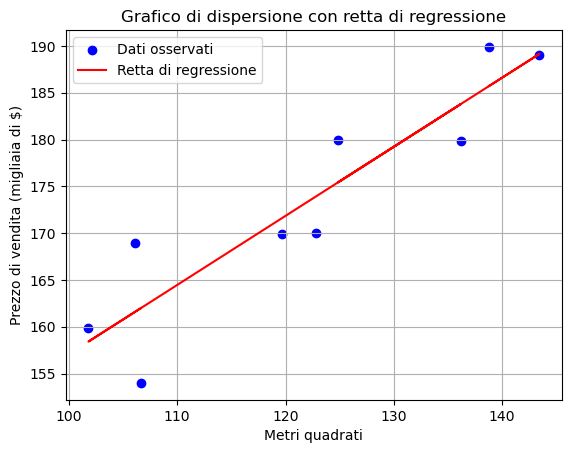

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Dati (Metri quadrati, Prezzo di vendita in migliaia di dollari)
metratura = np.array([106.64, 101.81, 106.09, 119.65, 122.81, 136.19, 124.85, 143.43, 138.79])
prezzo = np.array([154, 159.9, 169, 169.9, 170, 179.9, 180, 189, 189.9])

# Calcolo della media
mean_x = np.mean(metratura)
mean_y = np.mean(prezzo)
print(f"Media metratura: {mean_x:.2f}")
print(f"Media prezzo: {mean_y:.2f}")

# Calcolo della deviazione standard campionaria
std_x = np.sqrt(np.sum((metratura - mean_x) ** 2) / (len(metratura) - 1))
std_y = np.sqrt(np.sum((prezzo - mean_y) ** 2) / (len(prezzo) - 1))
print(f"Deviazione standard metratura: {std_x:.2f}")
print(f"Deviazione standard prezzo: {std_y:.2f}")

# Calcolo dei prodotti degli z-score
z_x = (metratura - mean_x) / std_x
z_y = (prezzo - mean_y) / std_y
sum_z_product = np.sum(z_x * z_y)
print(f"Somma dei prodotti degli z-score: {sum_z_product:.2f}")

# Calcolo del coefficiente di correlazione
corr_coef = sum_z_product / (len(metratura) - 1)
print(f"Coefficiente di correlazione: {corr_coef:.2f}")

# Calcolo del coefficiente angolare (slope) e intercetta (intercept)
slope_explicit = corr_coef * (std_y / std_x)
intercept_explicit = mean_y - slope_explicit * mean_x
print(f"Retta di regressione (calcolo esplicito): y = {slope_explicit:.2f}x + {intercept_explicit:.2f}")

# Confronto con scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(metratura, prezzo)
print(f"Retta di regressione (Scipy): y = {slope:.2f}x + {intercept:.2f}")

# Interpretazione del coefficiente angolare
print(f"Un aumento di 1 m² è associato a un aumento medio di {slope:.2f} mila dollari.")

# Interpretazione dell'intercetta
print("L'intercetta indica il prezzo previsto per una casa con 0 m², ma non ha un significato realistico.")

# Stima del prezzo per una casa di 101.44 m²
prezzo_stimato = slope * 101.44 + intercept
print(f"Prezzo stimato per una casa di 101.44 m²: {prezzo_stimato:.2f} mila dollari")

# Disegno del grafico di dispersione e retta di regressione
plt.scatter(metratura, prezzo, color='blue', label="Dati osservati")
plt.plot(metratura, slope * metratura + intercept, color='red', label="Retta di regressione")
plt.xlabel("Metri quadrati")
plt.ylabel("Prezzo di vendita (migliaia di $)")
plt.title("Grafico di dispersione con retta di regressione")
plt.grid(True)
plt.legend()
plt.show()

# Trucco per sveltire i calcoli
Se alcuni residui si ripetono usa la somma con le frequenze 